# PCA Bottleneck Analysis
Analyze neural network performance when projecting activations through a reduced dimensionality space (via PCA)

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(root_dir)

In [28]:
from src.pca_projection_analyzer import PCAProjectionAnalyzer
from src.pca_projection_plots import PCAProjectionPlotter

In [4]:
CHECKPOINT_DIR = root_dir + '/ckpts/2025-02-13_09-26-08'
pca_ablation_data_path = os.path.join(CHECKPOINT_DIR, 'pca_ablation_outputs.npz')

In [7]:
STRONG_MODEL_FILE = "FrankaCabinetGPT_epoch__eval.pth"

In [29]:
analyzer = PCAProjectionAnalyzer()

In [30]:
analyzer.load_data(pca_ablation_data_path, CHECKPOINT_DIR, STRONG_MODEL_FILE)

Loading data from: /mnt/c/Users/nick_work/projects/SPAR_EUREKA/ckpts/2025-02-13_09-26-08/FrankaCabinetGPT_epoch__eval.npz
Data shape: (58, 64, 9)


In [31]:
metrics = analyzer.compute_metrics_across_components()

In [32]:
plotter = PCAProjectionPlotter()

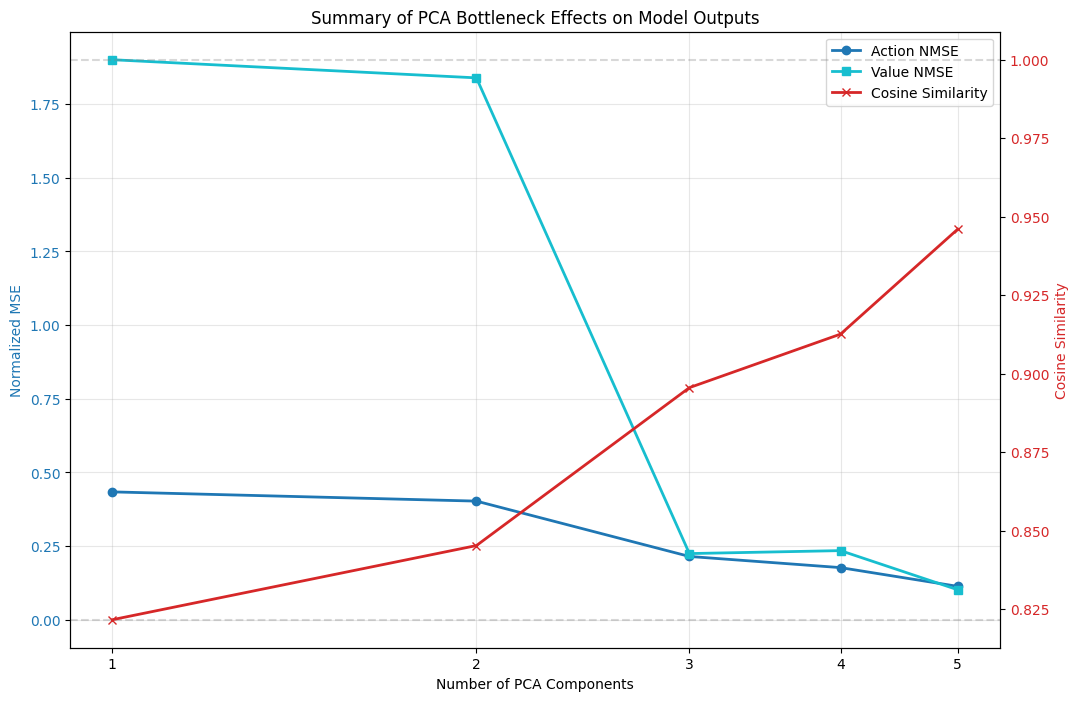

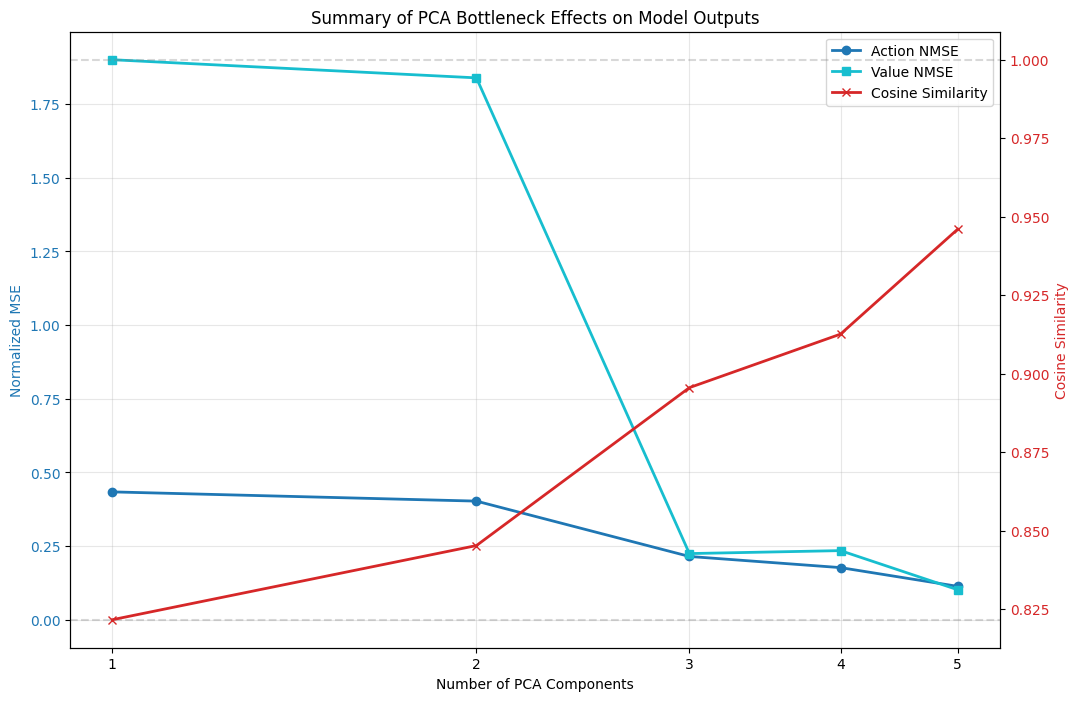

In [16]:
plotter.create_summary_plot(metrics)

In [22]:
mu_metric_names = ['mu_mse', 'mu_max_dev']

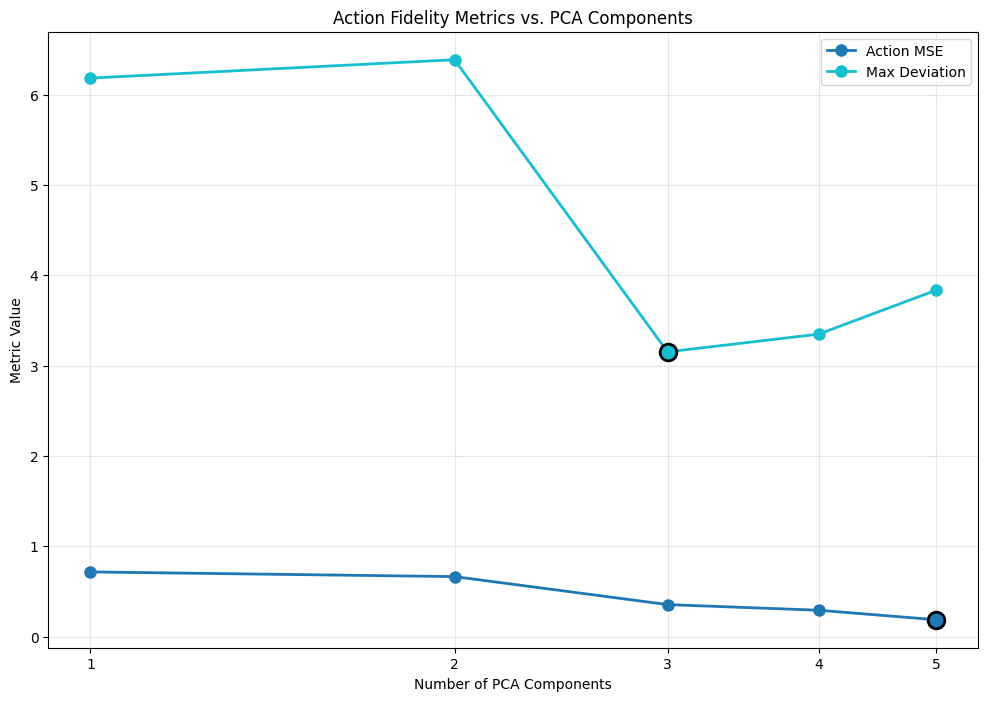

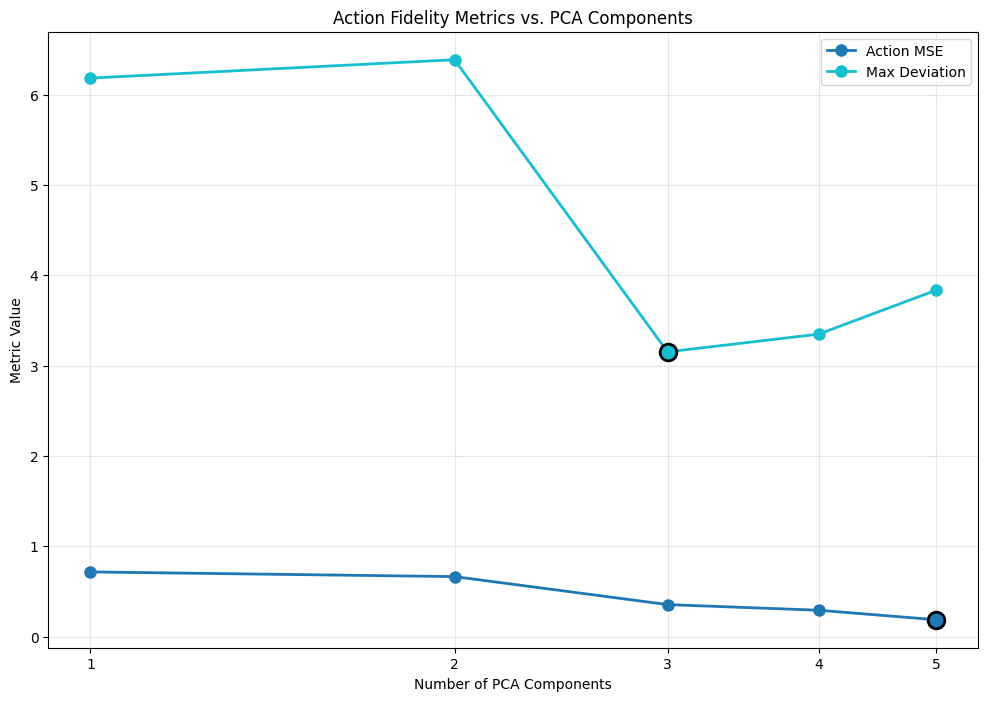

In [23]:
plotter.plot_metrics_vs_components(metrics, mu_metric_names)

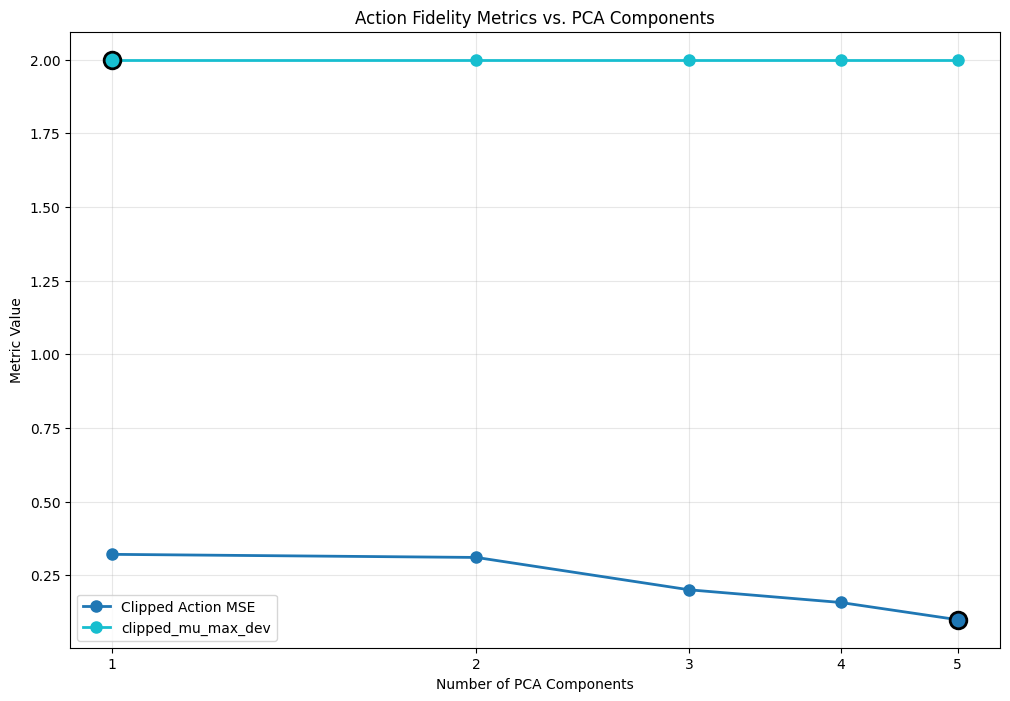

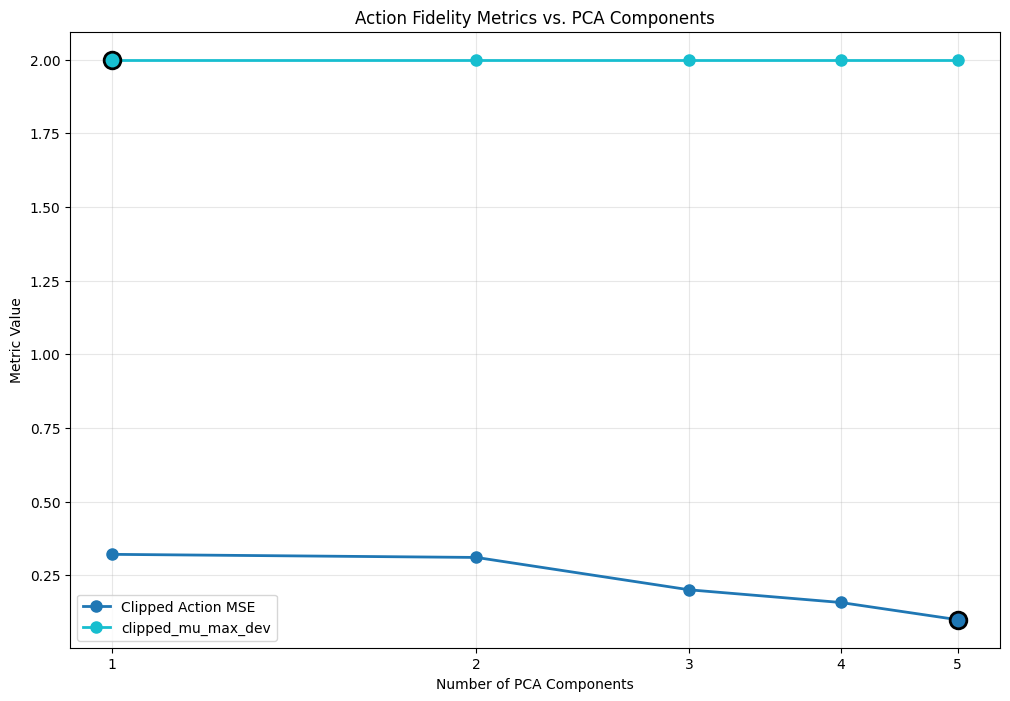

In [24]:
clipped_mu_metric_names = ['clipped_mu_mse', 'clipped_mu_max_dev']
plotter.plot_metrics_vs_components(metrics, clipped_mu_metric_names)

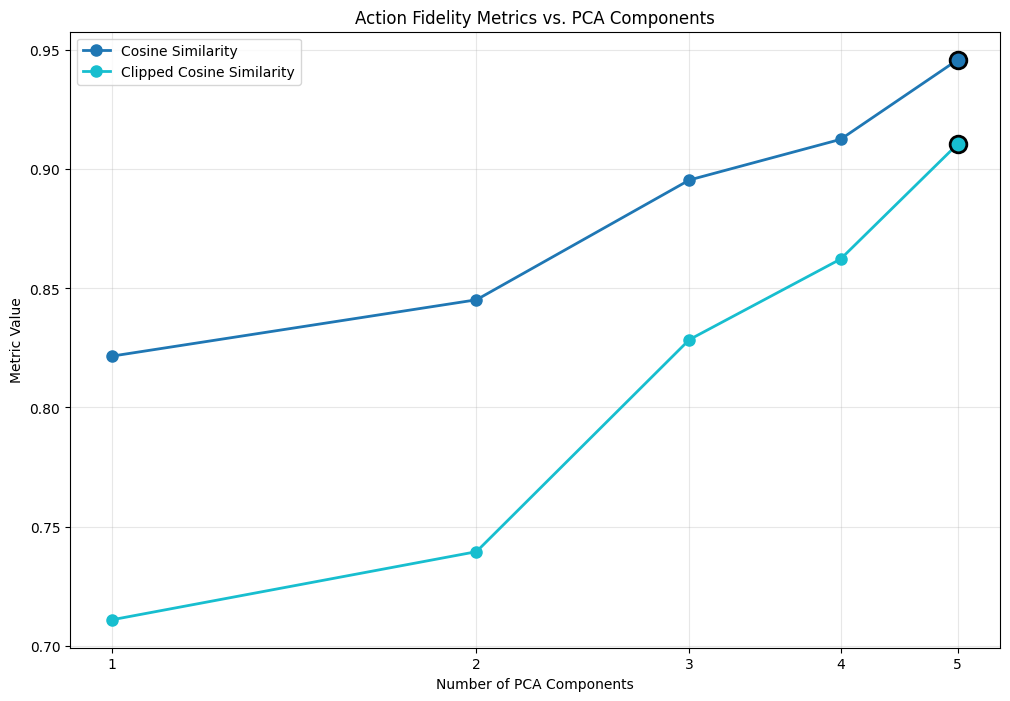

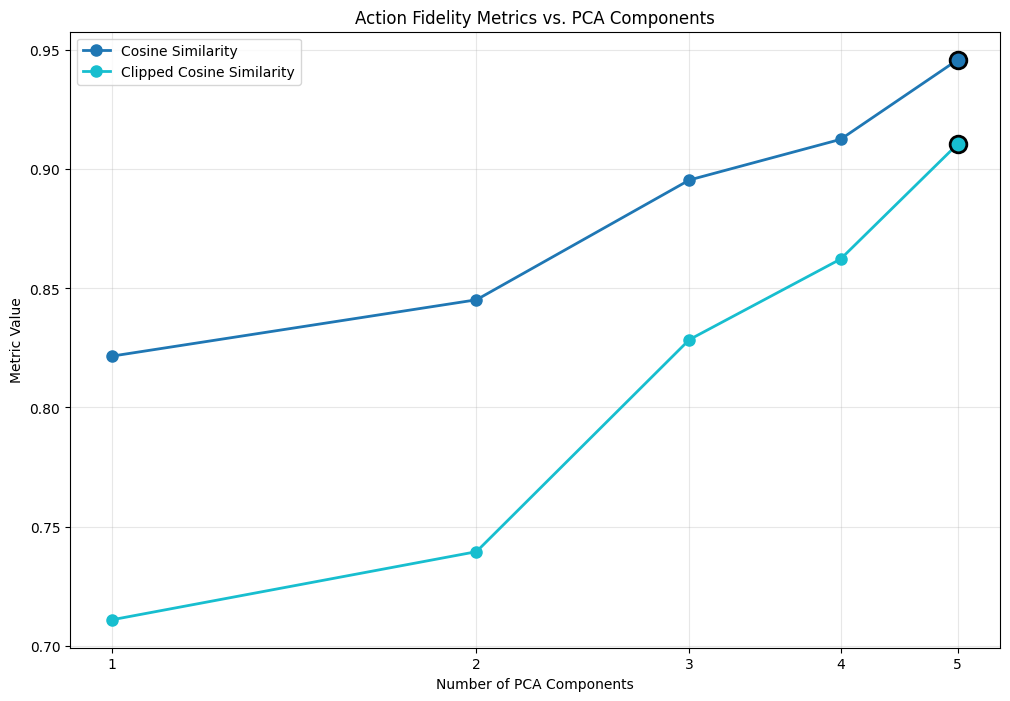

In [25]:
mu_cosine_names = ['mu_cosine', 'clipped_mu_cosine']
plotter.plot_metrics_vs_components(metrics, mu_cosine_names)

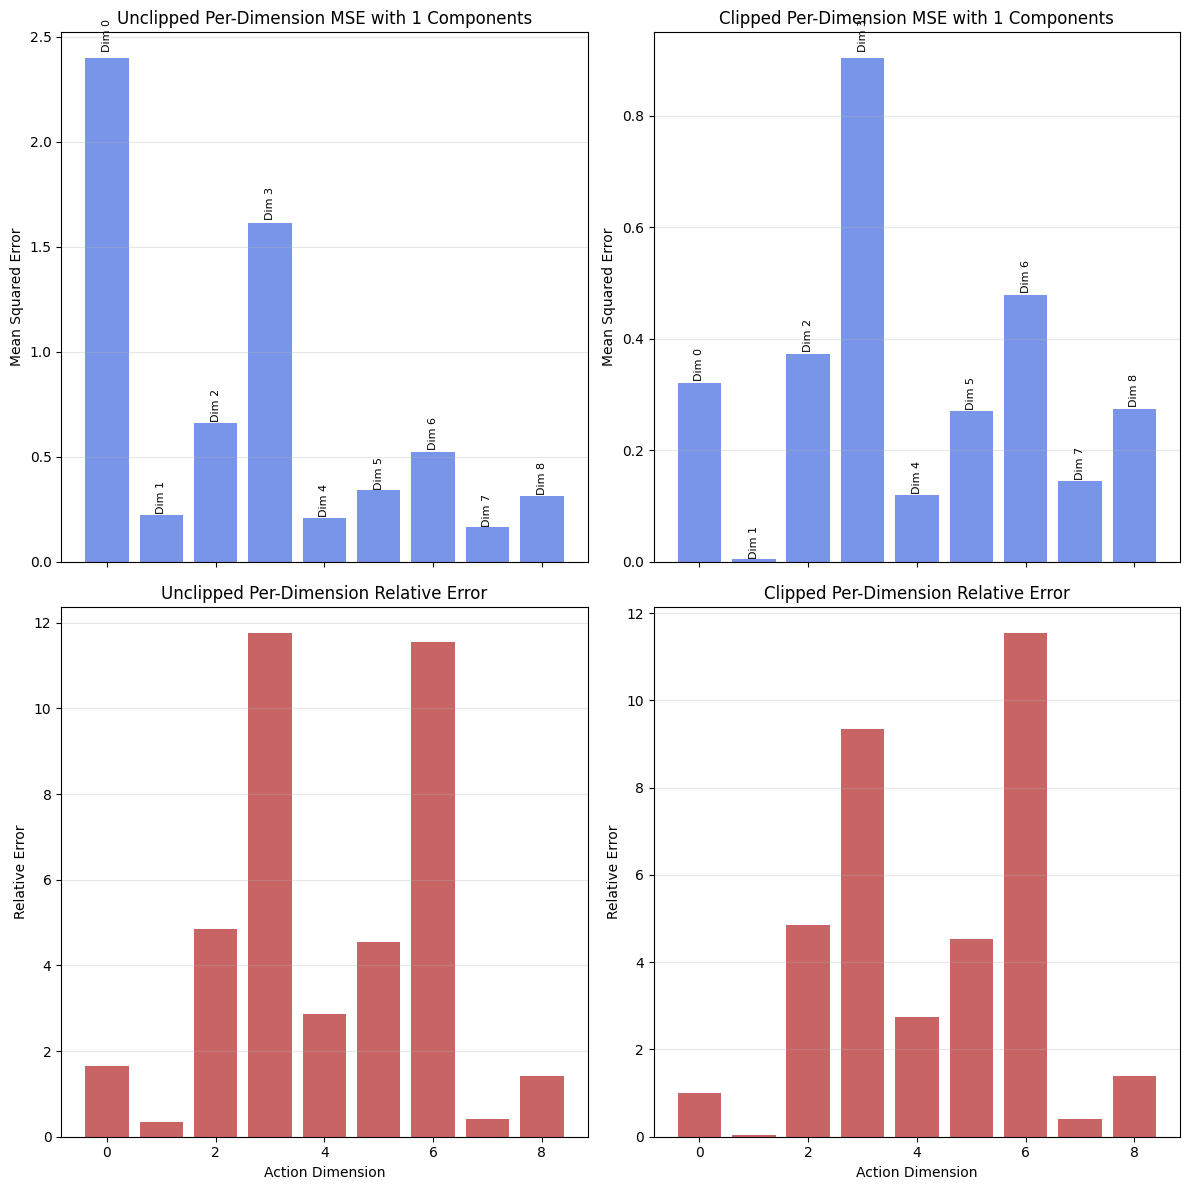

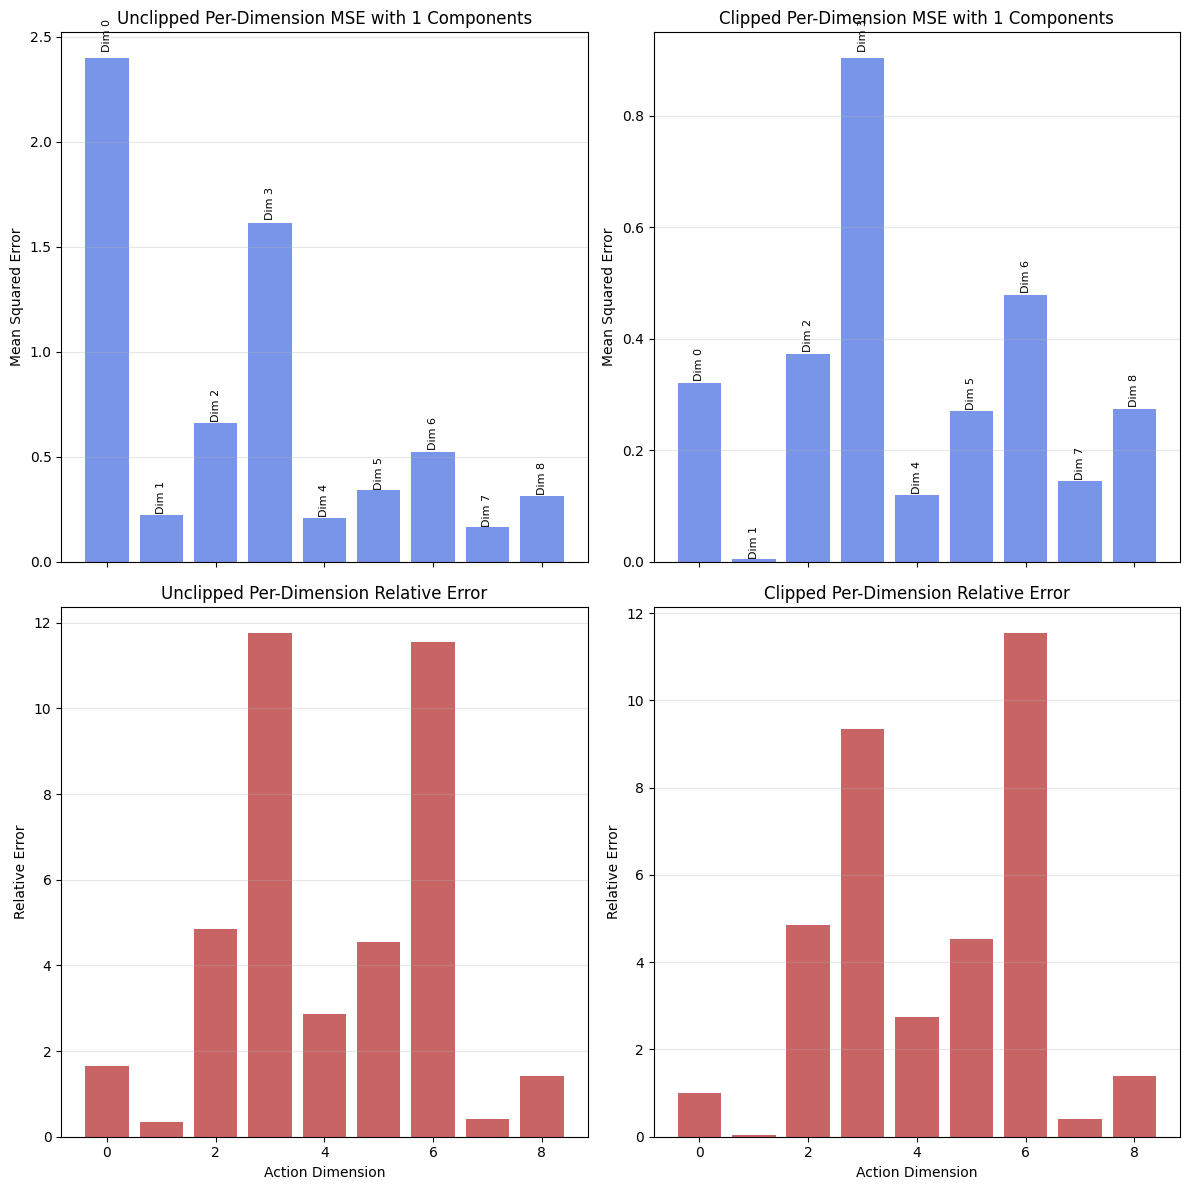

In [33]:
plotter.plot_dimension_errors(analyzer.dimension_errors, 1)

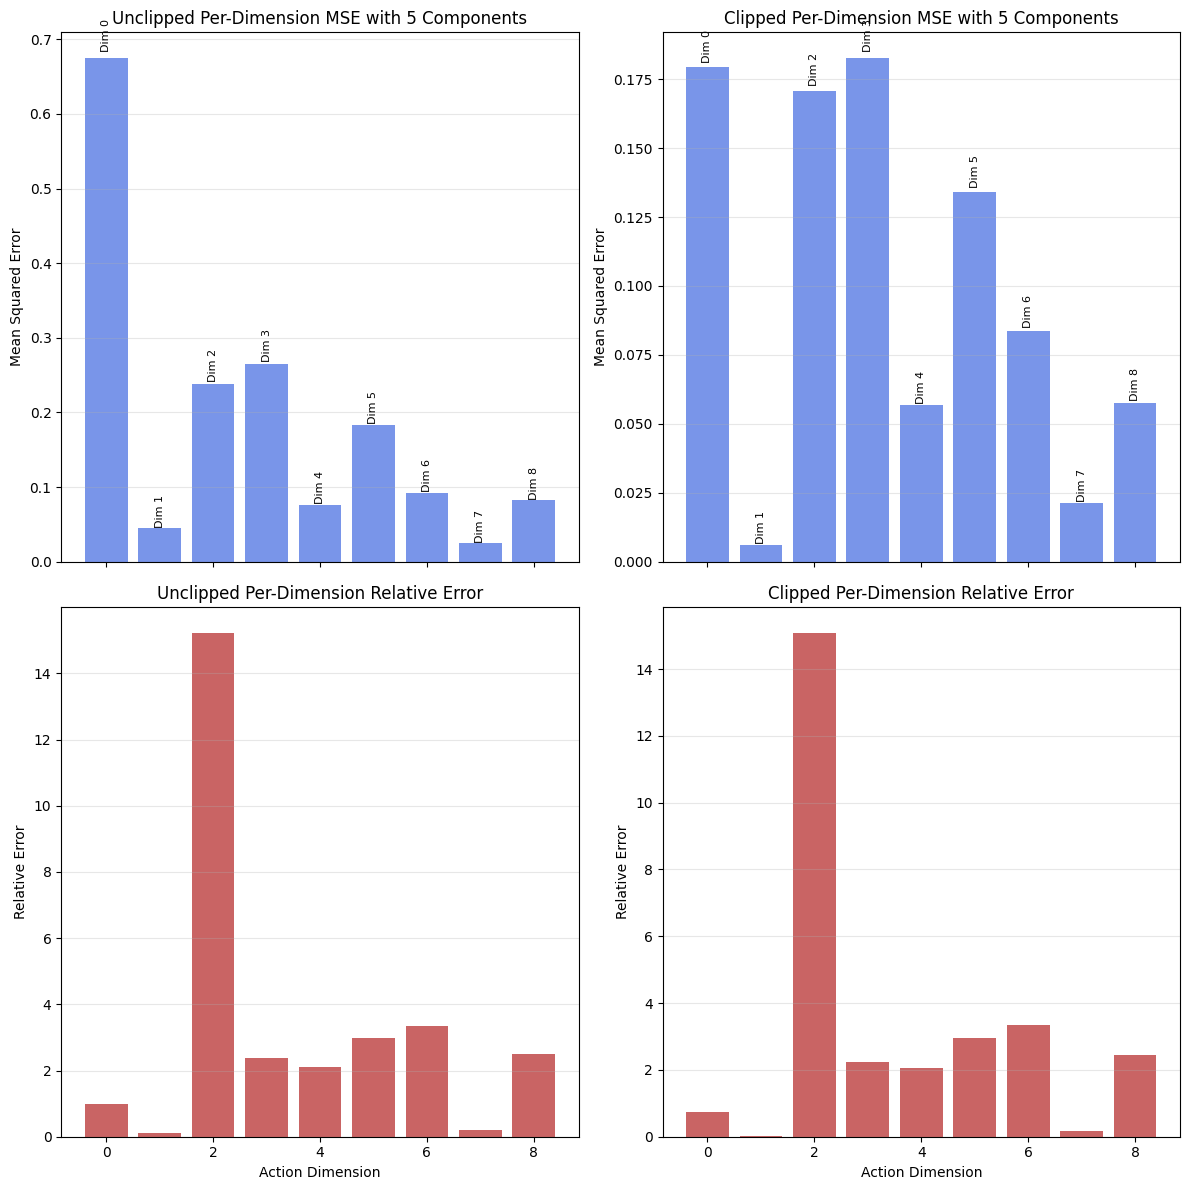

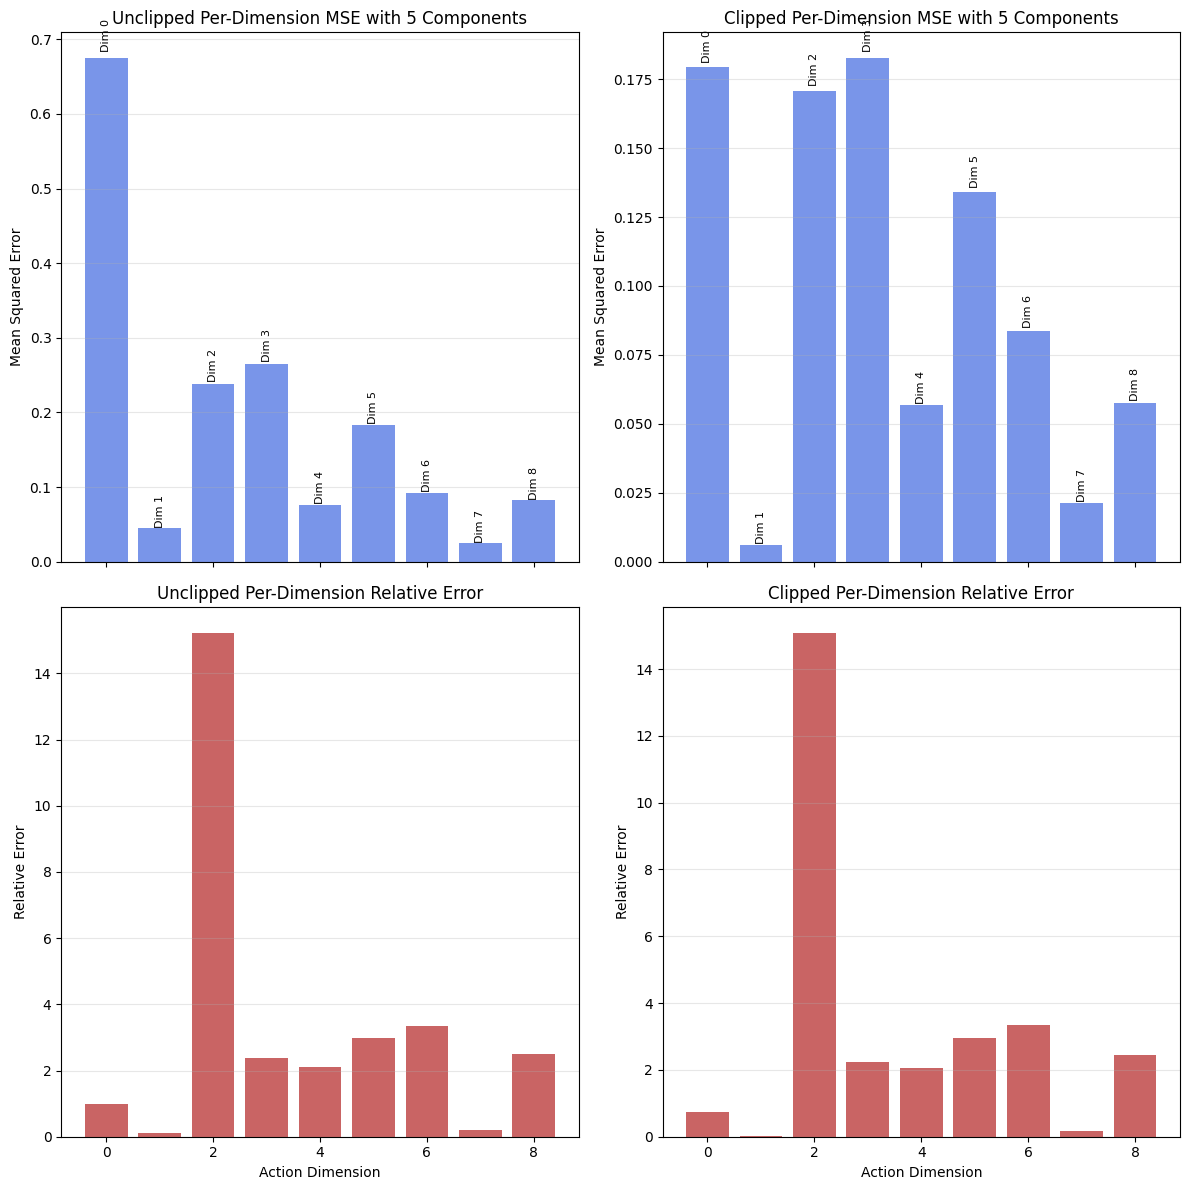

In [34]:
plotter.plot_dimension_errors(analyzer.dimension_errors, 5)

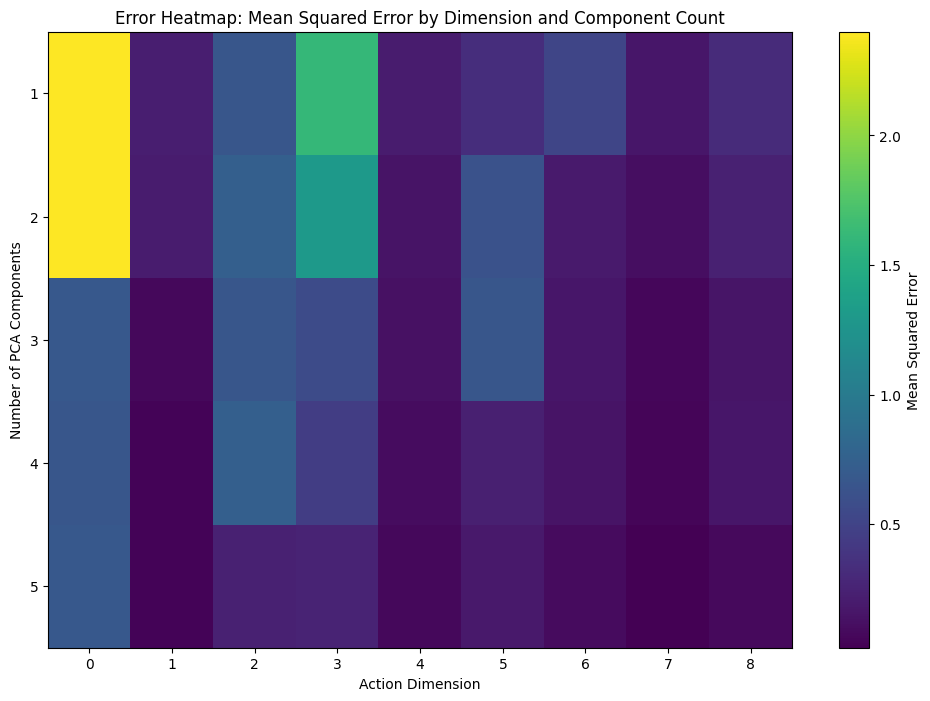

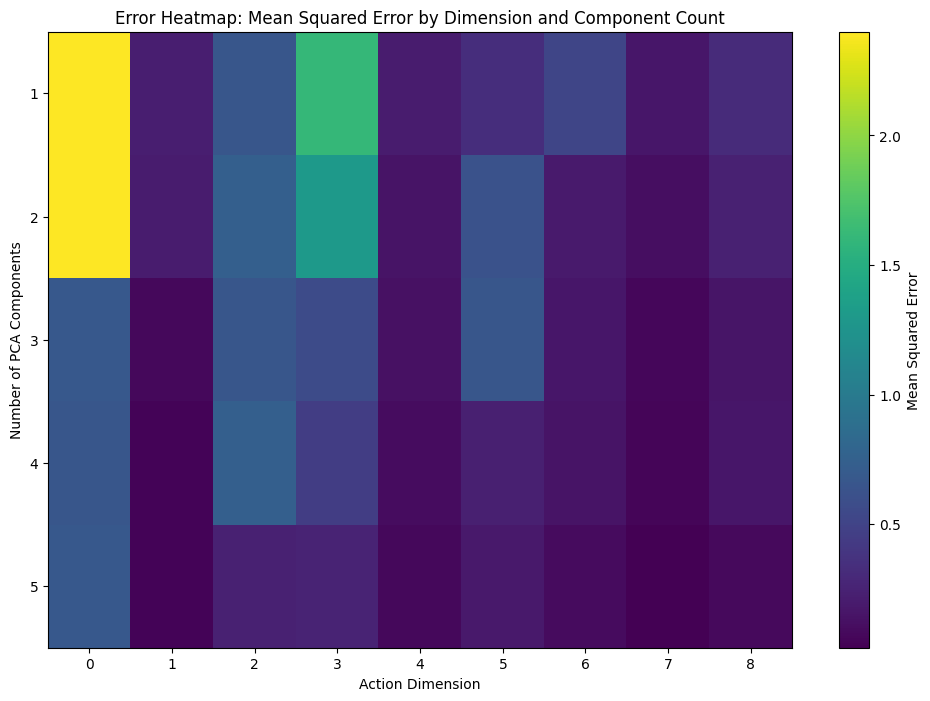

In [35]:
plotter.plot_dimension_errors_heatmap(analyzer.dimension_errors)

seems like action 0, 3, 2 are most affected by PCA bottlenecking

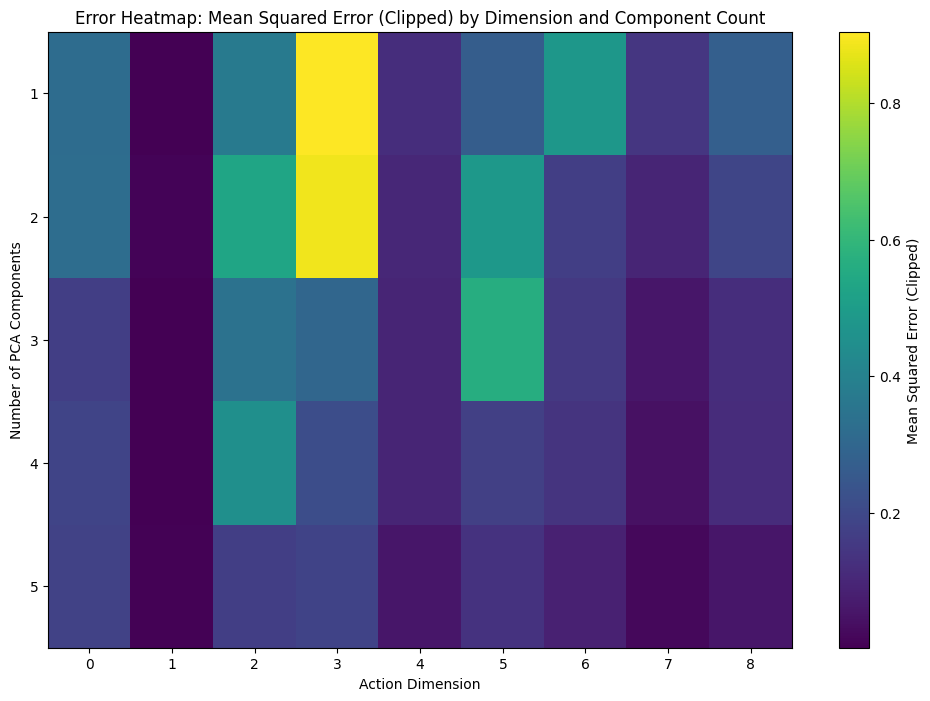

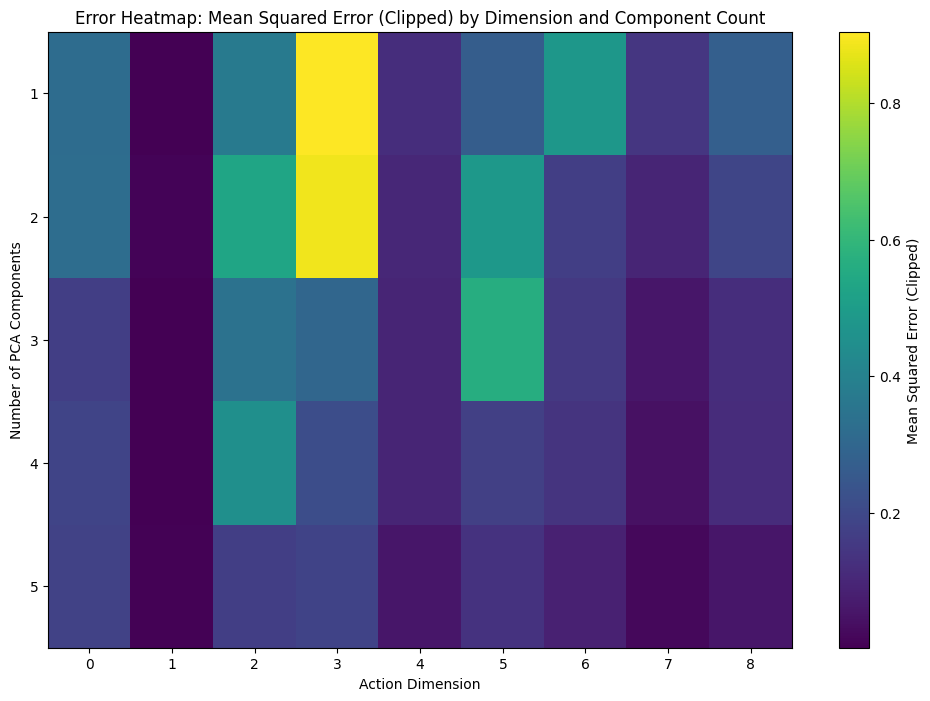

In [36]:
plotter.plot_dimension_errors_heatmap(analyzer.dimension_errors, use_clipped=True)

after clipping, the order becomes 3, 5/2 -- indicating that dim 0's apparent error above isnt as bad as it first appears